<a href="https://colab.research.google.com/github/Colsai/DATA-601-Wan/blob/main/DATA601_prj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA601 WAN
# Chicago Public Schools
### Project 2: Answer a question

### Description:
* In Project 1, I looked through the datasets of different Chicago Public Schools to see how schools were performing.   
* In Project 2, I would like to explore the trends and compare neighborhood and charter schools over the last 4 years.


#### Background:
One of the pressing questions in education is whether are not Charter schools perform better than other school types in terms of delivering a better education for students.  

For this project, I want to look through the last four years of data and see what conclusions can be made about college preparedness by school types (are charter schools really better than neighborhood school equivalents?)

There are several resources on differences between charter schools and neighborhood/public schools...

*See:*
- https://www.greatschools.org/gk/articles/public-private-charter-schools/
- https://rhodesschool.org/differences-between-charter-and-public-schools/


---
### Hypothesis 1:  
* On Performance Metrics, Over the last 4 years, charter schools have a statistically significant difference in College attendance rates over Neighborhood schools.
* Null Hypothesis: There is a statistical significance between Charter Schools and Neighborhood Schools in College Readiness.


### Hypothesis 2: 
* Charter Schools have a statistically-significant higher graduation rate than neighborhood schools.  
See: https://www.publicschoolreview.com/blog/charter-schools-produce-more-graduates-than-public-schools#:~:text=Study%3A%20Charter%20High%20Schools%20Have,Than%20Their%20Public%20School%20Peers.

### Steps:
1. Merge Data from the datasets, clean it up a bit, and check for nulls
2. Choose data from the dataframes
3. Select by school type
4. Compare mean/median
5. Answer the question- is there a significant difference between two sets of data?

### Dataset Sources:   
https://data.cityofchicago.org/
- cps_1516_df: Chicago Public Schools Report Card 2015-2016
- cps_1617_df: Chicago Public Schools Report Card 2016-2017
- cps_1718_df: Chicago Public Schools Report Card 2017-2018
- cps_1819_df: Chicago Public Schools Report Card 2018-2019

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
#Import each dataset (Chicago Public Schools)
start_time = time.time()

cps_1516_df = pd.read_csv("https://data.cityofchicago.org/api/views/fvrx-esxp/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
cps_1617_df = pd.read_csv("https://data.cityofchicago.org/api/views/cp7s-7gxg/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
cps_1718_df = pd.read_csv("https://data.cityofchicago.org/api/views/wkiz-8iya/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
cps_1819_df = pd.read_csv("https://data.cityofchicago.org/api/views/dw27-rash/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

dur = time.time()- start_time
print(f"{round(dur,3)}s")

6.224s


In [78]:
#In-line display the elements
def show_all(input_list, line_len = 3):
    num_in_line = 0

    for elem in input_list:
        if num_in_line > line_len - 1:
            print(f"")
            print(elem, end = ', ')
            num_in_line = 0
        
        else:
            print(elem, end = ', ')
        
        num_in_line += 1

## 1. Data Preparation (Merging the dataset and checking for nulls)

## 1b. Are the columns of yearly progress report the same?
- check by comparing the sizes of each

REF: https://pandas.pydata.org/docs/user_guide/merging.html

In [ ]:
#Introduce the four years' datasets
all_dfs = [cps_1516_df,
           cps_1617_df,
           cps_1718_df,
           cps_1819_df]

for dataframe in all_dfs:
    print(f"elem:{dataframe.size} | cols:{(dataframe.shape)}")

elem:102510 | cols:(670, 153)
elem:106421 | cols:(661, 161)
elem:107743 | cols:(661, 163)
elem:119028 | cols:(654, 182)


*Note:* Most of the dataframes are pretty similar. There are a few differences in school count between the first dataframe and the others, and the number of columns increases per year, but they are not tremendously different here. 

We should not have any problems combining the data.

In [ ]:
#Checks the columns and appends to list all values that are not in one.
def compare_cols(df1, df2):
    not_in = []

    for elem in df1.columns:
        if elem not in df2.columns:
            not_in.append(elem)        

    return not_in

Let's compare the dataframes to see if any of the columns are different with each one.  
*This check only goes one way (it checks what something lacks, but not what it might have that the other dataframe does not).* 

In [ ]:
#Compare elements between columns
compare_cols(cps_1516_df,cps_1617_df)

[]

In [ ]:
compare_cols(cps_1617_df,cps_1718_df)

['Address',
 'City',
 'State',
 'Zip',
 'Growth_ACT_Grade_11_Pct',
 'Growth_ACT_Grade_11_Lbl',
 'Attainment_ACT_Grade_11_Pct',
 'Attainment_ACT_Grade_11_Lbl',
 'School_Latitude',
 'School_Longitude']

In [ ]:
compare_cols(cps_1718_df,cps_1819_df)

['PSAT_9_Average',
 'PSAT_10_Average',
 'SAT_School_Average',
 'SAT_District_Average',
 'PSAT_9_Growth_Pct',
 'PSAT_10_Growth_Pct',
 'SAT_Growth_Pct',
 'PSAT_9_Attainment_Pct',
 'PSAT_10_Attainment_Pct',
 'SAT_Attainment_Pct',
 'Location']

So, there are a few different variables, but overall the data is mostly the same.

## 1c. Merge the datasets
- Merge them on School_ID
Recast all School_ID as INT so that we can merge them
Note: One issue is that the 1718 and 1819 datasets have school_id as a string (with an included comma), wheras the 1516 and 1617 have them as an int.  

We have to remove the comma and recast them as ints so that they can be merged. 
- drop commas ("000,000" -> 000000)
- recast as INT

In [ ]:
#Drop "," and replace Columns as 'int' for cps_1718 and cps_1819
cps_1718_df['School_ID'] = cps_1718_df['School_ID'].apply(lambda x:int(x.replace(",","")))
cps_1819_df['School_ID'] = cps_1819_df['School_ID'].apply(lambda x:int(x.replace(",","")))

In [ ]:
#Merge the datasets together. (Outer join to keep all data)
df_1517 = cps_1516_df.merge(cps_1617_df, how = "outer", on="School_ID", suffixes=('_1516','_1617'))
df_1719 = cps_1718_df.merge(cps_1819_df, how = "outer",  on = "School_ID",suffixes = ('_1718','_1819'))

#Join the data again
full_df = df_1517.merge(df_1719, how = "outer", on="School_ID")

### Check the merged dataset to make sure it worked

In [83]:
full_df.head(2)

,School_ID,Short_Name_1516,Long_Name_1516,School_Type_1516,Primary_Category_1516,Address_1516,City_1516,State_1516,Zip_1516,Phone_1516,Fax_1516,CPS_School_Profile_1516,Website_1516,Progress_Report_Year_1516,Blue_Ribbon_Award_Year_1516,Excelerate_Award_Gold_Year_1516,Spot_Light_Award_Year_1516,Improvement_Award_Year_1516,Excellence_Award_Year_1516,Student_Growth_Rating_1516,Student_Growth_Description_1516,Growth_Reading_Grades_Tested_Pct_ES_1516,Growth_Reading_Grades_Tested_Label_ES_1516,Growth_Math_Grades_Tested_Pct_ES_1516,Growth_Math_Grades_Tested_Label_ES_1516,Student_Attainment_Rating_1516,Student_Attainment_Description_1516,Attainment_Reading_Pct_ES_1516,Attainment_Reading_Lbl_ES_1516,Attainment_Math_Pct_ES_1516,Attainment_Math_Lbl_ES_1516,Culture_Climate_Rating_1516,Culture_Climate_Description_1516,School_Survey_Student_Response_Rate_Pct_1516,School_Survey_Student_Response_Rate_Avg_Pct_1516,School_Survey_Teacher_Response_Rate_Pct_1516,School_Survey_Teacher_Response_Rate_Avg_Pct_1516,Healthy_School_Certification_1516,Healthy_School_Certification_Description_1516,Creative_School_Certification_1516,...,College_Persistence_School_Pct_Year_2_1819,College_Persistence_CPS_Pct_Year_2_1819,College_Persistence_School_Pct_Year_1_1819,College_Persistence_CPS_Pct_Year_1_1819,Progress_Toward_Graduation_Year_1_1819,Progress_Toward_Graduation_Year_2_1819,State_School_Report_Card_URL_1819,Mobility_Rate_Pct_1819,Chronic_Truancy_Pct_1819,Empty_Progress_Report_Message_1819,School_Survey_Rating_Description_1819,Supportive_School_Award_1819,Supportive_School_Award_Desc_1819,Parent_Survey_Results_Year_1819,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,610547,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,Selective enrollment,HS,1955 E 75TH ST,Chicago,Illinois,60649.0,7.735358e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.southshoreinternational.org,2015.0,NaN,NaN,NaN,2012.0,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,ORGANIZED,Results are based on student and teacher respo...,81.1,81.2,90.5,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,68.1,72.3,63.0,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,2.9,45.4,NaN,This school does not have enough data for a re...,NOT RATED,This school has not submitted an action plan t...,"2,018",41.758792,-87.576353,818,891,929,969.0,9.0,9th,92.0,92nd,5.0,5th,35.7,35.7,45.9,45.9,18.5,18.5,34.1,34.1,29.0,29th,33.0,33rd,37.0,37th
1,400097,NOBLE - BULLS HS,Noble - Chicago Bulls College Prep,Charter,HS,2040 W ADAMS ST,Chicago,Illinois,60612.0,7.735348e+09,3.128500e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.chicagobullscollegeprep.org,2015.0,NaN,NaN,NaN,NaN,NaN,AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,ABOVE AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,59.3,81.2,72.4,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,8

In [89]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 677
Columns: 656 entries, School_ID to Growth_SAT_Math_Grade_11_School_Lbl
dtypes: float64(345), int64(1), object(310)
memory usage: 3.4+ MB


In [88]:
#What kinds of data are in the new dataframe?
full_df.dtypes.value_counts()

float64    345
object     310
int64        1
dtype: int64

In [ ]:
#What percent of the data is null?
(full_df.isna().sum().sum()) / (full_df.size)

0.29766754802503775

##2. Comparing College Entrance Rates, Charter High Schools vs. Neighborhood High Schools
One of the major indicators of how successful schools are at delivering education is looking at College Entrance enrollment rates. In this section, we will look at...
- How successful are Charter Schools vs. Neighborhood Schools at getting students into College? 
- Is it significant?

In [91]:
#Head of the new dataframe
full_df.head(3)

,School_ID,Short_Name_1516,Long_Name_1516,School_Type_1516,Primary_Category_1516,Address_1516,City_1516,State_1516,Zip_1516,Phone_1516,Fax_1516,CPS_School_Profile_1516,Website_1516,Progress_Report_Year_1516,Blue_Ribbon_Award_Year_1516,Excelerate_Award_Gold_Year_1516,Spot_Light_Award_Year_1516,Improvement_Award_Year_1516,Excellence_Award_Year_1516,Student_Growth_Rating_1516,Student_Growth_Description_1516,Growth_Reading_Grades_Tested_Pct_ES_1516,Growth_Reading_Grades_Tested_Label_ES_1516,Growth_Math_Grades_Tested_Pct_ES_1516,Growth_Math_Grades_Tested_Label_ES_1516,Student_Attainment_Rating_1516,Student_Attainment_Description_1516,Attainment_Reading_Pct_ES_1516,Attainment_Reading_Lbl_ES_1516,Attainment_Math_Pct_ES_1516,Attainment_Math_Lbl_ES_1516,Culture_Climate_Rating_1516,Culture_Climate_Description_1516,School_Survey_Student_Response_Rate_Pct_1516,School_Survey_Student_Response_Rate_Avg_Pct_1516,School_Survey_Teacher_Response_Rate_Pct_1516,School_Survey_Teacher_Response_Rate_Avg_Pct_1516,Healthy_School_Certification_1516,Healthy_School_Certification_Description_1516,Creative_School_Certification_1516,...,College_Persistence_School_Pct_Year_2_1819,College_Persistence_CPS_Pct_Year_2_1819,College_Persistence_School_Pct_Year_1_1819,College_Persistence_CPS_Pct_Year_1_1819,Progress_Toward_Graduation_Year_1_1819,Progress_Toward_Graduation_Year_2_1819,State_School_Report_Card_URL_1819,Mobility_Rate_Pct_1819,Chronic_Truancy_Pct_1819,Empty_Progress_Report_Message_1819,School_Survey_Rating_Description_1819,Supportive_School_Award_1819,Supportive_School_Award_Desc_1819,Parent_Survey_Results_Year_1819,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,610547,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,Selective enrollment,HS,1955 E 75TH ST,Chicago,Illinois,60649.0,7.735358e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.southshoreinternational.org,2015.0,NaN,NaN,NaN,2012.0,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,ORGANIZED,Results are based on student and teacher respo...,81.1,81.2,90.5,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,68.1,72.3,63.0,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,2.9,45.4,NaN,This school does not have enough data for a re...,NOT RATED,This school has not submitted an action plan t...,"2,018",41.758792,-87.576353,818,891,929,969.0,9.0,9th,92.0,92nd,5.0,5th,35.7,35.7,45.9,45.9,18.5,18.5,34.1,34.1,29.0,29th,33.0,33rd,37.0,37th
1,400097,NOBLE - BULLS HS,Noble - Chicago Bulls College Prep,Charter,HS,2040 W ADAMS ST,Chicago,Illinois,60612.0,7.735348e+09,3.128500e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.chicagobullscollegeprep.org,2015.0,NaN,NaN,NaN,NaN,NaN,AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,ABOVE AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,59.3,81.2,72.4,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,8

In [90]:
#Add elements to list
base_list = ["School_ID", 
             "Long_Name_1516",
             "School_Type_1516",
             'Primary_Category_1516']

clg_prep_list =[elem for elem in full_df if "college" in elem.lower()]
college_list = base_list + clg_prep_list

#Create dataframe college_df
college_df = full_df[college_list]

In [ ]:
#Nulls from the College DF
college_df.isna().sum()

School_ID                                       0
Long_Name_1516                                  8
School_Type_1516                                8
Primary_Category_1516                           8
College_Enrollment_School_Pct_Year_2_1516     524
College_Enrollment_CPS_Pct_Year_2_1516         12
College_Enrollment_School_Pct_Year_1_1516     532
College_Enrollment_CPS_Pct_Year_1_1516         12
College_Persistence_School_Pct_Year_2_1516    548
College_Persistence_CPS_Pct_Year_2_1516        12
College_Persistence_School_Pct_Year_1_1516    573
College_Persistence_CPS_Pct_Year_1_1516        12
College_Enrollment_School_Pct_Year_2_1617     519
College_Enrollment_CPS_Pct_Year_2_1617         18
College_Enrollment_School_Pct_Year_1_1617     528
College_Enrollment_CPS_Pct_Year_1_1617         18
College_Persistence_School_Pct_Year_2_1617    547
College_Persistence_CPS_Pct_Year_2_1617        18
College_Persistence_School_Pct_Year_1_1617    550
College_Persistence_CPS_Pct_Year_1_1617        18


We see a lot of nulls, but most of these make sense. Any of the College Enrollment numbers are mostly only applicable to the high schools, so a majority of values will not be in the dataset.

## Focus on High Schools for Graduation Rate
Now, let's take a look at the graduation rates only for high schools, so that we can narrow our focus to Charters vs. Neighborhood

This function selects different elements that fulfill certain conditions. 
- Returns columns of elements where there is a string match (helpful for selecting 'HS'/'ES', etc.)
- null is set to false, so it will ignore nulls. 

In [ ]:
#String matches what you are looking for
def category_find(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False,na=False)] 

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False,na=False)] 
    return find_it

In [ ]:
#create a new dataframe called 'hs_df' for schools classified as 'hs' (high school).
hs_df = category_find(college_df, 'Primary_Category_1516', 'HS')

In [ ]:
#How many nulls does this new dataframe have?
hs_df.isna().sum().sum()

1045

Unfortunately, there are some null values. Let's see what we get from a few years of looking at this.

Quick look at the first year of data (2015-2016 from 2 years back).

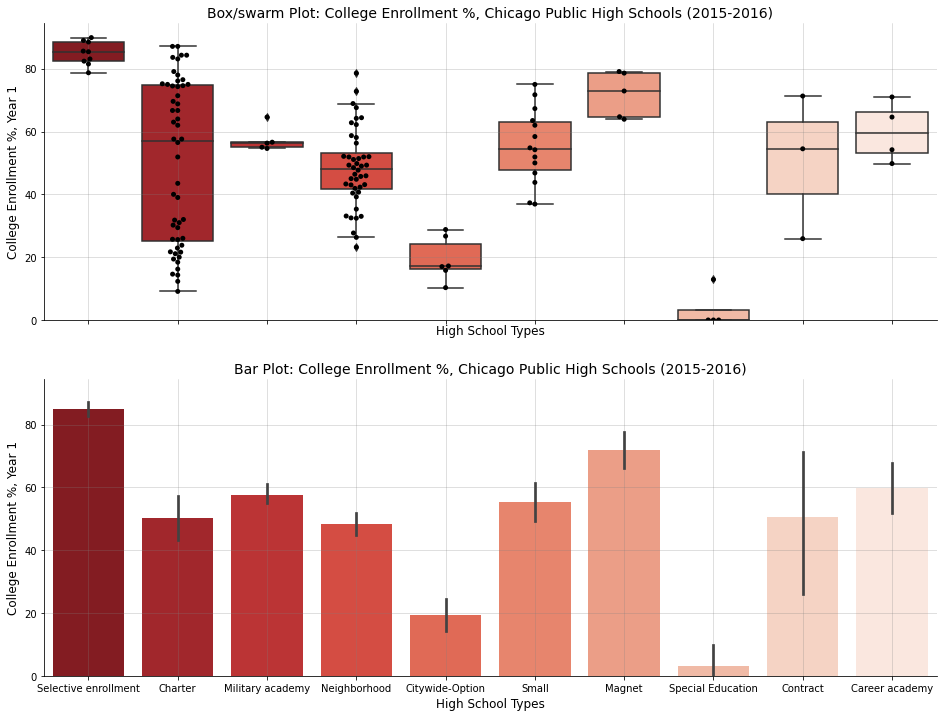

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(2, figsize = (16,12), sharex = True, sharey = True)

sns.swarmplot(x = hs_df.School_Type_1516, y = hs_df.College_Enrollment_School_Pct_Year_1_1516, color = 'black', ax = ax[0])
sns.boxplot(x = hs_df.School_Type_1516, y = hs_df.College_Enrollment_School_Pct_Year_1_1516, palette= "Reds_r", ax = ax[0])
sns.despine()

plt.title("College Enrollment % (Year 1), CPS 2018-2019")

#Labeling Graph
sns.barplot(data=hs_df, x='School_Type_1516', y = 'College_Enrollment_School_Pct_Year_1_1516',  palette="Reds_r")

plotnames = ['Box/swarm','Bar']

for i in range(0,2):
    ax[i].set_title(f"{plotnames[i]} Plot: College Enrollment %, Chicago Public High Schools (2015-2016)", size = 14 )
    ax[i].set_xlabel("High School Types", size = 12)
    ax[i].set_ylabel("College Enrollment %, Year 1", size = 12)
    ax[i].grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

Just comparing the neighborhood and charter schools here, it does not appear that in their first year there was a significant difference in students who decided to enroll in College upon graduation. 

What are the different columns of data that show the College Entrance rates of students?

In [ ]:
#How many nulls in the data are there?
college_df.isna().sum()

School_ID                                       0
Long_Name_1516                                  8
School_Type_1516                                8
Primary_Category_1516                           8
College_Enrollment_School_Pct_Year_2_1516     524
College_Enrollment_CPS_Pct_Year_2_1516         12
College_Enrollment_School_Pct_Year_1_1516     532
College_Enrollment_CPS_Pct_Year_1_1516         12
College_Persistence_School_Pct_Year_2_1516    548
College_Persistence_CPS_Pct_Year_2_1516        12
College_Persistence_School_Pct_Year_1_1516    573
College_Persistence_CPS_Pct_Year_1_1516        12
College_Enrollment_School_Pct_Year_2_1617     519
College_Enrollment_CPS_Pct_Year_2_1617         18
College_Enrollment_School_Pct_Year_1_1617     528
College_Enrollment_CPS_Pct_Year_1_1617         18
College_Persistence_School_Pct_Year_2_1617    547
College_Persistence_CPS_Pct_Year_2_1617        18
College_Persistence_School_Pct_Year_1_1617    550
College_Persistence_CPS_Pct_Year_1_1617        18


In [ ]:
for elem in college_df.columns:
    if "college_enrollment_school" in elem.lower():
        print(elem)

College_Enrollment_School_Pct_Year_2_1516
College_Enrollment_School_Pct_Year_1_1516
College_Enrollment_School_Pct_Year_2_1617
College_Enrollment_School_Pct_Year_1_1617
College_Enrollment_School_Pct_Year_2_1718
College_Enrollment_School_Pct_Year_1_1718
College_Enrollment_School_Pct_Year_2_1819
College_Enrollment_School_Pct_Year_1_1819


[Text(0, 0, 'Selective enrollment'),
 Text(0, 0, 'Charter'),
 Text(0, 0, 'Military academy'),
 Text(0, 0, 'Neighborhood'),
 Text(0, 0, 'Citywide-Option'),
 Text(0, 0, 'Small'),
 Text(0, 0, 'Magnet'),
 Text(0, 0, 'Special Education'),
 Text(0, 0, 'Contract'),
 Text(0, 0, 'Career academy')]

<Figure size 432x288 with 0 Axes>

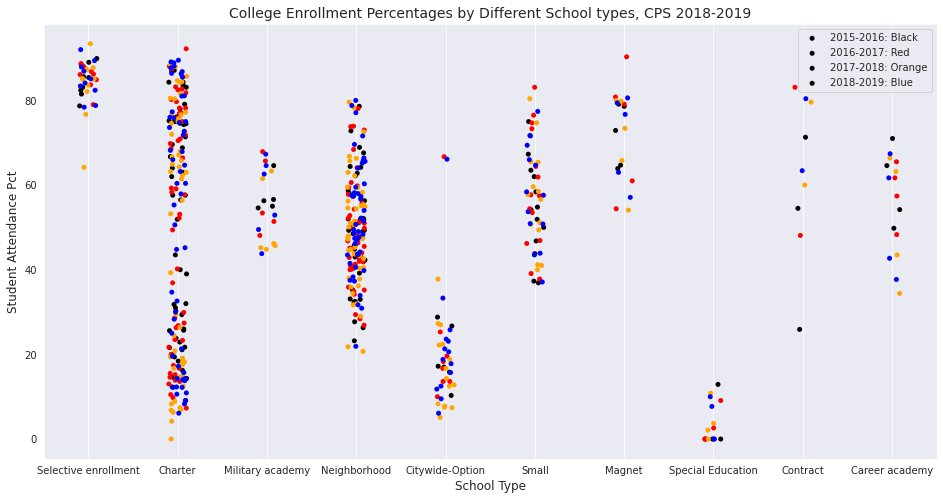

In [ ]:
# Generally, do year 1 and year 2 school attendances look similar, per school type?
sns.set_style('darkgrid')
sns.despine()

fig, ax = plt.subplots(figsize = (16,8), sharex=True, sharey = True)

sns.stripplot(data = hs_df, x = 'School_Type_1516', y = 'College_Enrollment_School_Pct_Year_1_1516', color = 'black', label = "2015-2016")
sns.stripplot(data = hs_df, x = 'School_Type_1516', y = 'College_Enrollment_School_Pct_Year_1_1617', color = 'red', label = "2016-2017")
sns.stripplot(data = hs_df, x = 'School_Type_1516', y = 'College_Enrollment_School_Pct_Year_1_1718', color = 'orange', label = "2017-2018")
sns.stripplot(data = hs_df, x = 'School_Type_1516', y = 'College_Enrollment_School_Pct_Year_1_1819', color = 'blue', label = "2018-2019")

#sns.violinplot(data = df, x = 'School_Type', y = 'Student_Attendance_Year_1_Pct', palette = 'muted')
ax.set_title("College Enrollment Percentages by Different School types, CPS 2018-2019", size = 14)
ax.set_xlabel("School Type", size = 12)
ax.set_ylabel("Student Attendance Pct", size = 12)
ax.grid(axis = 'both')
ax.legend(['2015-2016: Black','2016-2017: Red', '2017-2018: Orange', '2018-2019: Blue'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

Roughly, what kind of distribution are College Enrollment Rates?

(array([ 3., 10., 15., 12., 15., 21., 19., 20., 17., 14.]),
 array([ 0.  ,  8.99, 17.98, 26.97, 35.96, 44.95, 53.94, 62.93, 71.92,
        80.91, 89.9 ]),
 <a list of 10 Patch objects>)

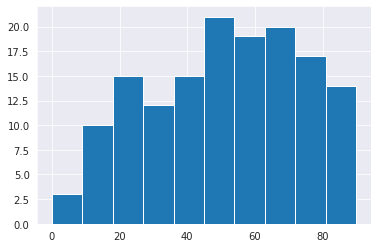

In [ ]:
#What does the distribution look like?
plt.hist(hs_df.College_Enrollment_School_Pct_Year_1_1516)

In [ ]:
college_prep_df = hs_df[['School_Type_1516', 
                                'College_Enrollment_School_Pct_Year_1_1516', 
                                'College_Enrollment_School_Pct_Year_1_1617',
                                'College_Enrollment_School_Pct_Year_1_1718',
                                'College_Enrollment_School_Pct_Year_1_1819']]

In [ ]:
college_prep_df.head()

,School_Type_1516,College_Enrollment_School_Pct_Year_1_1516,College_Enrollment_School_Pct_Year_1_1617,College_Enrollment_School_Pct_Year_1_1718,College_Enrollment_School_Pct_Year_1_1819
0,Selective enrollment,NaN,NaN,64.2,78.4
1,Charter,83.6,83.2,84.4,86.3
4,Selective enrollment,88.5,87.6,87.3,85.1
5,Charter,43.5,53.1,39.3,30.0
9,Military academy,56.6,51.4,61.5,52.9


Let's melt the dataframe so that we can look at it and extract values

In [ ]:
#Melt dataframe for all years
college_prep_all_df = pd.melt(college_prep_df, id_vars=['School_Type_1516'], 
                              var_name='Year', 
                              value_name='Percent')

college_prep_all_df

,School_Type_1516,Year,Percent
0,Selective enrollment,College_Enrollment_School_Pct_Year_1_1516,NaN
1,Charter,College_Enrollment_School_Pct_Year_1_1516,83.6
2,Selective enrollment,College_Enrollment_School_Pct_Year_1_1516,88.5
3,Charter,College_Enrollment_School_Pct_Year_1_1516,43.5
4,Military academy,College_Enrollment_School_Pct_Year_1_1516,56.6
...,...,...,...
747,Charter,College_Enrollment_School_Pct_Year_1_1819,6.1
748,Charter,College_Enrollment_School_Pct_Year_1_1819,NaN
749,Charter,College_Enrollment_School_Pct_Year_1_1819,9.1
750,Citywide-Option,College_Enrollment_School_Pct_Year_1_1819,23.6


In [ ]:
charter_college_df = category_find(college_prep_all_df, 'School_Type_1516', 'Charter', exact = False)
neighborhood_college_df = category_find(college_prep_all_df, 'School_Type_1516', 'Neighborhood', exact = False)
magnet_college_df = category_find(college_prep_all_df, 'School_Type_1516', 'Magnet', exact = False)

In [ ]:
college_prep_all_df.groupby('School_Type_1516').describe()

Percent                        ...                     
                       count       mean        std  ...    50%     75%   max
School_Type_1516                                    ...                     
Career academy          16.0  55.593750  11.486309  ...  59.55  64.825  71.0
Charter                209.0  50.262679  28.445823  ...  58.30  75.900  92.2
Citywide-Option         43.0  19.848837  12.791578  ...  17.20  23.350  66.7
Contract                 9.0  62.922222  18.476321  ...  63.40  79.600  83.1
Magnet                  20.0  71.735000  10.375187  ...  75.05  79.500  90.3
Military academy        22.0  55.500000   8.081608  ...  54.80  63.125  67.9
Neighborhood           177.0  49.641243  12.820095  ...  48.40  57.800  80.0
Selective enrollment    38.0  84.573684   5.064006  ...  85.15  87.675  93.4
Small                   55.0  57.045455  12.339695  ...  57.50  65.450  83.1
Special Education       16.0   3.681250   4.712992  ...   1.05   8.050  12.9

[10 rows x 8 columns]

Thoughts: From a cursory look at the data, there does not appear to be a significant difference between the performance of 
- Charter Schools (n=209 / μ = 50.26) and 
- Neighborhood Schools (n=177/ μ = 49.64)  
in their mean college entrance rates.

However, let's check that hypothesis with a T-Test.


### Welch T-Test to Check Significance
So, our data is
- unpaired, since schools are different
- appears to be normal in distribution (parametric)

So, let's use a Welch T-Test
https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62


Welch T-Test
(Ref: https://www.statology.org/welch-t-test-python/)


In [ ]:
#Are the variances equal?
np.nanvar(charter_college_df.Percent) == np.nanvar(neighborhood_college_df.Percent)

False

In [ ]:
#Import Scipy and Omit NaNs.
from scipy import stats

stats.ttest_ind(charter_college_df.Percent, 
                neighborhood_college_df.Percent,
                equal_var = False, 
                nan_policy = 'omit')

Ttest_indResult(statistic=0.28364091061519503, pvalue=0.7768816293914667)

In this case, we have to reject the null hypothesis.   
There may be a difference between the two types of schools, but it isn't significant, with a P-value > .05.

# Graduation Rates
Next, we can take a look at the graduation rates of students in high school, another strong indicator of delivering successful instruction. Higher graduation rates should naturally suggest that the overall education being delivered is at a higher quality- more students are on-board, etc.


Data Definitions: https://www.splitgraph.com/cityofchicago/chicago-public-schools-school-progress-reports-cp7s-7gxg

*Note: "Year_1" is 2 years ago, "Year_2" is last year's graduation data.*

In [ ]:
for elem in full_df.columns:
    if "graduation" in elem.lower():
        print(elem)

Progress_Toward_Graduation_Year_1_1516
Progress_Toward_Graduation_Year_2_1516
Graduation_4_Year_School_Pct_Year_2
Graduation_4_Year_CPS_Pct_Year_2
Graduation_4_Year_School_Pct_Year_1
Graduation_4_Year_CPS_Pct_Year_1
Graduation_5_Year_School_Pct_Year_2
Graduation_5_Year_CPS_Pct_Year_2
Graduation_5_Year_School_Pct_Year_1
Graduation_5_Year_CPS_Pct_Year_1
Progress_Toward_Graduation_Year_1_1617
Progress_Toward_Graduation_Year_2_1617
Graduation_4_Year_School_Pct_Year_2_1718
Graduation_4_Year_CPS_Pct_Year_2_1718
Graduation_4_Year_School_Pct_Year_1_1718
Graduation_4_Year_CPS_Pct_Year_1_1718
Graduation_5_Year_School_Pct_Year_2_1718
Graduation_5_Year_CPS_Pct_Year_2_1718
Graduation_5_Year_School_Pct_Year_1_1718
Graduation_5_Year_CPS_Pct_Year_1_1718
Progress_Toward_Graduation_Year_1_1718
Progress_Toward_Graduation_Year_2_1718
Graduation_4_Year_School_Pct_Year_2_1819
Graduation_4_Year_CPS_Pct_Year_2_1819
Graduation_4_Year_School_Pct_Year_1_1819
Graduation_4_Year_CPS_Pct_Year_1_1819
Graduation_5_Yea

In [63]:
#Create the dataframe by selecting elements relating to graduation
base_list = ["School_ID", "Long_Name_1516","School_Type_1516",'Primary_Category_1516']
clg_prep_list =[elem for elem in full_df if ("graduation_4_year_school_pct_year_2" in elem.lower()) or (elem.lower() == "graduation_4_year_school_pct_year_1")]
gradrate_list = base_list + clg_prep_list

*Note:* Unfortunately, for graduation rates, we only have data from 1617/1718/1819.  
However, we have two years of data for each year. Year 2 is the last year, and Year 1 is the year before, so we actually have all four years here.

In [ ]:
#Let's create the more-focused dataframe for these items
gradrate_df = full_df[gradrate_list]

#'Year 1' Denotes 2 years ago; year_1 == year 2 1516
gradrate_df = gradrate_df.rename(columns={"Graduation_4_Year_School_Pct_Year_2": "Graduation_4_Year_School_Pct_Year_2_1617",
                                          "Graduation_4_Year_School_Pct_Year_1": "Graduation_4_Year_School_Pct_Year_2_1516"})

#Create focused dataframe (only HS)
gradrate_hs_df = category_find(gradrate_df, 'Primary_Category_1516', 'HS')

In [ ]:
#Check the data before proceeding
gradrate_hs_df.head()

,School_ID,Long_Name_1516,School_Type_1516,Primary_Category_1516,Graduation_4_Year_School_Pct_Year_2_1617,Graduation_4_Year_School_Pct_Year_2_1516,Graduation_4_Year_School_Pct_Year_2_1718,Graduation_4_Year_School_Pct_Year_2_1819
0,610547,South Shore Intl College Prep High School,Selective enrollment,HS,85.8,69.6,86.9,94.5
1,400097,Noble - Chicago Bulls College Prep,Charter,HS,77.8,62.6,84.9,82.4
4,609678,William Jones College Preparatory High School,Selective enrollment,HS,97.6,90.4,93.3,95.2
5,400136,YCCS-Olive Harvey Middle College HS,Charter,HS,NaN,NaN,NaN,NaN
9,610513,Air Force Academy High School,Military academy,HS,75.7,80.2,78.9,75.5


Looks OK. Now we have data from the years that we need, and graduation rates over the last four years. Since we are looking at how all of the schools are doing, let's take a similar process to the last step. 



In [70]:
#Looking at the shape of the data...
gradrate_hs_df.shape

(188, 8)

In [69]:
#What missing values are there?
gradrate_hs_df.isna().sum()

School_ID                                    0
Long_Name_1516                               0
School_Type_1516                             0
Primary_Category_1516                        0
Graduation_4_Year_School_Pct_Year_2_1617    59
Graduation_4_Year_School_Pct_Year_2_1516    71
Graduation_4_Year_School_Pct_Year_2_1718    49
Graduation_4_Year_School_Pct_Year_2_1819    48
dtype: int64

## Melt data into single column so that we can graph it...

In [ ]:
#Melt dataframe for all years
gradrate_mlt_df = gradrate_hs_df[['School_Type_1516',
                                 'Graduation_4_Year_School_Pct_Year_2_1516',
                                 'Graduation_4_Year_School_Pct_Year_2_1617',
                                 'Graduation_4_Year_School_Pct_Year_2_1718',
                                 'Graduation_4_Year_School_Pct_Year_2_1819',
                                 ]]

gradrate_mlt_df = pd.melt(gradrate_mlt_df, id_vars=['School_Type_1516'], 
                              var_name='Year', 
                              value_name='Percent')

gradrate_mlt_df
#gradrate_mlt_df.isna().sum()

,School_Type_1516,Year,Percent
0,Selective enrollment,Graduation_4_Year_School_Pct_Year_2_1516,69.6
1,Charter,Graduation_4_Year_School_Pct_Year_2_1516,62.6
2,Selective enrollment,Graduation_4_Year_School_Pct_Year_2_1516,90.4
3,Charter,Graduation_4_Year_School_Pct_Year_2_1516,NaN
4,Military academy,Graduation_4_Year_School_Pct_Year_2_1516,80.2
...,...,...,...
747,Charter,Graduation_4_Year_School_Pct_Year_2_1819,NaN
748,Charter,Graduation_4_Year_School_Pct_Year_2_1819,NaN
749,Charter,Graduation_4_Year_School_Pct_Year_2_1819,NaN
750,Citywide-Option,Graduation_4_Year_School_Pct_Year_2_1819,3.3


In [ ]:
#And create two smaller dataframes so that we can compare them in a T-Test
charter_grad_srs = category_find(gradrate_mlt_df, 'School_Type_1516', 'Charter', exact = False)
nbd_grad_srs = category_find(gradrate_mlt_df, 'School_Type_1516', 'Neighborhood', exact = False)

In [71]:
#Let's look at the charter data
charter_grad_srs.head(3)

,School_Type_1516,Year,Percent
1,Charter,Graduation_4_Year_School_Pct_Year_2_1516,62.6
3,Charter,Graduation_4_Year_School_Pct_Year_2_1516,NaN
6,Charter,Graduation_4_Year_School_Pct_Year_2_1516,NaN


In [ ]:
#What nulls do we have?
charter_grad_srs.isna().sum()

School_Type_1516      0
Year                  0
Percent             134
dtype: int64

In [74]:
#What neighborhood nulls do we have?
nbd_grad_srs.isna().sum()

School_Type_1516    0
Year                0
Percent             8
dtype: int64

(array([ 29.,   5.,   4.,   8.,  18.,  54.,  91., 118., 140.,  58.]),
 array([ 0.  ,  9.88, 19.76, 29.64, 39.52, 49.4 , 59.28, 69.16, 79.04,
        88.92, 98.8 ]),
 <a list of 10 Patch objects>)

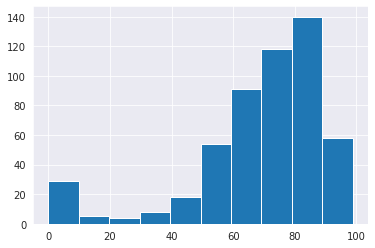

In [62]:
#What does the distribution look like?
plt.hist(gradrate_mlt_df.Percent)

In [ ]:
#Are the variances equal?
np.nanvar(charter_grad_srs.Percent) == np.nanvar(nbd_grad_srs.Percent)

False

In [75]:
#Comparing Means
print(f"Charter Schools mean: {np.nanmean(charter_grad_srs.Percent)}")
print(f"Charter Schools median: {np.nanmedian(charter_grad_srs.Percent)}")

print(f"Neighborhood Schools mean: {np.nanmean(nbd_grad_srs.Percent)}")
print(f"Neighborhood Schools median: {np.nanmedian(nbd_grad_srs.Percent)}")

Charter Schools mean: 72.40821917808218
Charter Schools median: 75.9
Neighborhood Schools mean: 66.56722222222223
Neighborhood Schools median: 67.25


There appears to be a large difference between Charter Schools Graduation rates (in mean and median), and Neighborhood schools. However, let's check to see if the difference between charter schools and neighborhood schools is significant. 

In [ ]:
#Import Scipy and Omit NaNs.
from scipy import stats

stats.ttest_ind(charter_grad_srs.Percent, 
                nbd_grad_srs.Percent,
                equal_var = False, 
                nan_policy = 'omit')

Ttest_indResult(statistic=3.513728534801276, pvalue=0.000510959862511829)

So, with a pvalue at .0005, the difference is definitely significant between the two.  
Charter Schools graduate students at a higher rate than neighborhood schools.

*However*, one of the issues with the data is the frequency of reporting.     Looking at the number of nulls as a percent of the data... 

In [ ]:
print(f"Charter Nulls: {charter_grad_srs['Percent'].isna().sum() / charter_grad_srs.shape[0]}")
print(f"Nbd Nulls: {nbd_grad_srs['Percent'].isna().sum() / nbd_grad_srs.shape[0]}")

Charter Nulls: 0.4785714285714286
Nbd Nulls: 0.0425531914893617


*Note:* 47% of the graduation data from the charter schools is missing, compared to only 4% for neighborhood schools! If the school is reporting, it probably does better than a neighborhood school equivalent, but the issue is that schools which perform lower may not be reporting their graduation data. Additionally, new schools

- The focus of this project was to merge datasets, look through historical records of the schools in terms of performance data, and compare. From this data, 

# Conclusions
* Charter Schools appear to perform better for students in terms of graduation rates, although many fewer schools did not report data. 
* Charter Schools do not appear to do any better on College Entrance rates, however, with only a statistically-insignificant difference. 

# Things I learned
- Merging and Joining Data (and types of joins)
- Using T-Tests to check for significance
- Whether or not there was a significant difference between two sets of data.
